# Prediction of Icu Patient Survival Time - Support_2 Dataset

## 1. Introduction

### 1.1 The main aim of this task is

(a) To predict the survival time of a patient that is in ICU, this is a Regression type.

(b) 6 month survival, this is classification.

###1.2 Dataset:
  SUPPORT2 which has 9,105 ICU patients and 48 features like age,death,sex,etc. In this task we renamed support2 to t_data



### 2. Importing Necessary Libraries
In this research we have used pandas,seaborn,matplotlib,etc.

###  3. Exploratory Data Analysis

For getting the idea about dataset, i have used some commannds like df.info() for checking dataset structure
df.head() for viewing first 5 rows.


### 4. Data Preprocessing
Handling missing values, encoding categorical data,taking half data set to reduce run time.


### 5. Feature Selection

 Identifying most relevant features



###  6. Model Training - Regression

 Training Gaussian Process Regression (GPR)

 #### 6.1 Methods:
Baseline Model Comparision

Gaussian Process Regression

(Kernels - RBF, Matern, RationalQuadratic)

(Loss Function - MSE, MAE, R² Score)

Cross-Validated MSE

### 7. Model Evaluation

Analyzing accuracy, MSE, MAE, R² Score, Cross-Validated MSE


###  8. Conclusion & Insights
The best kernel

Key Takeaways:
- Model achieved 0.731808 accuracy for regression.
- GPR performed better than baseline model Linear Regression.
- Ethical concerns: AI can help doctors but it is nearly impossible to replace them.

### 1.2 Load  Dataset

In [1]:
# 1.2 Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Importing Necessary Libraries

In [2]:
# 2. Importing Necessary Libraries
!pip install -U scikit-learn
!pip install gpytorch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.gaussian_process import GaussianProcessRegressor, GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, roc_auc_score
from sklearn.gaussian_process.kernels import  ConstantKernel as Constker

from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.linear_model import LinearRegression


from sklearn.inspection import permutation_importance
from sklearn.kernel_approximation import Nystroem

from sklearn.pipeline import make_pipeline
from tabulate import tabulate






   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.7/277.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## 3. Exploratory Data Analysis

In [4]:
#  3. Load & Explore Dataset
t_data = pd.read_csv("/content/drive/MyDrive/data/MOU_Coursework /support2.csv")

### Understanding the Data

In [4]:
#  Summary Statistics

print("Dataset Overview:")             # Understanding the Data
print(t_data.info())                   # I will use basic pandas functions like info(),head() to understand data.
display(t_data.head())

t_data.describe(include='all').transpose()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sno       9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    91

,sno,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
1,2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
2,3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
3,4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
4,5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sno,9105.0,NaN,NaN,NaN,4553.0,2628.531434,1.0,2277.0,4553.0,6829.0,9105.0
age,9105.0,NaN,NaN,NaN,62.650823,15.59371,18.04199,52.797,64.85699,73.99896,101.84796
death,9105.0,NaN,NaN,NaN,0.681054,0.466094,0.0,0.0,1.0,1.0,1.0
sex,9105,2,male,5125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hospdead,9105.0,NaN,NaN,NaN,0.259198,0.438219,0.0,0.0,0.0,1.0,1.0
slos,9105.0,NaN,NaN,NaN,17.863042,22.00644,3.0,6.0,11.0,20.0,343.0
d.time,9105.0,NaN,NaN,NaN,478.449863,560.383272,3.0,26.0,233.0,761.0,2029.0
dzgroup,9105,8,ARF/MOSF w/Sepsis,3515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dzclass,9105,4,ARF/MOSF,4227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num.co,9105.0,NaN,NaN,NaN,1.868644,1.344409,0.0,1.0,2.0,3.0,9.0


In [5]:
t_data.columns

Index(['sno', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2',
       'adlsc'],
      dtype='object')

<ipython-input-8-3ceaa376a568>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_dist, x=column, ax=axes[i], palette='bright')
<ipython-input-8-3ceaa376a568>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_dist, x=column, ax=axes[i], palette='bright')
<ipython-input-8-3ceaa376a568>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_dist, x=column, ax=axes[i], palette='bright')
<ipython-input-8-3ceaa376a568>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

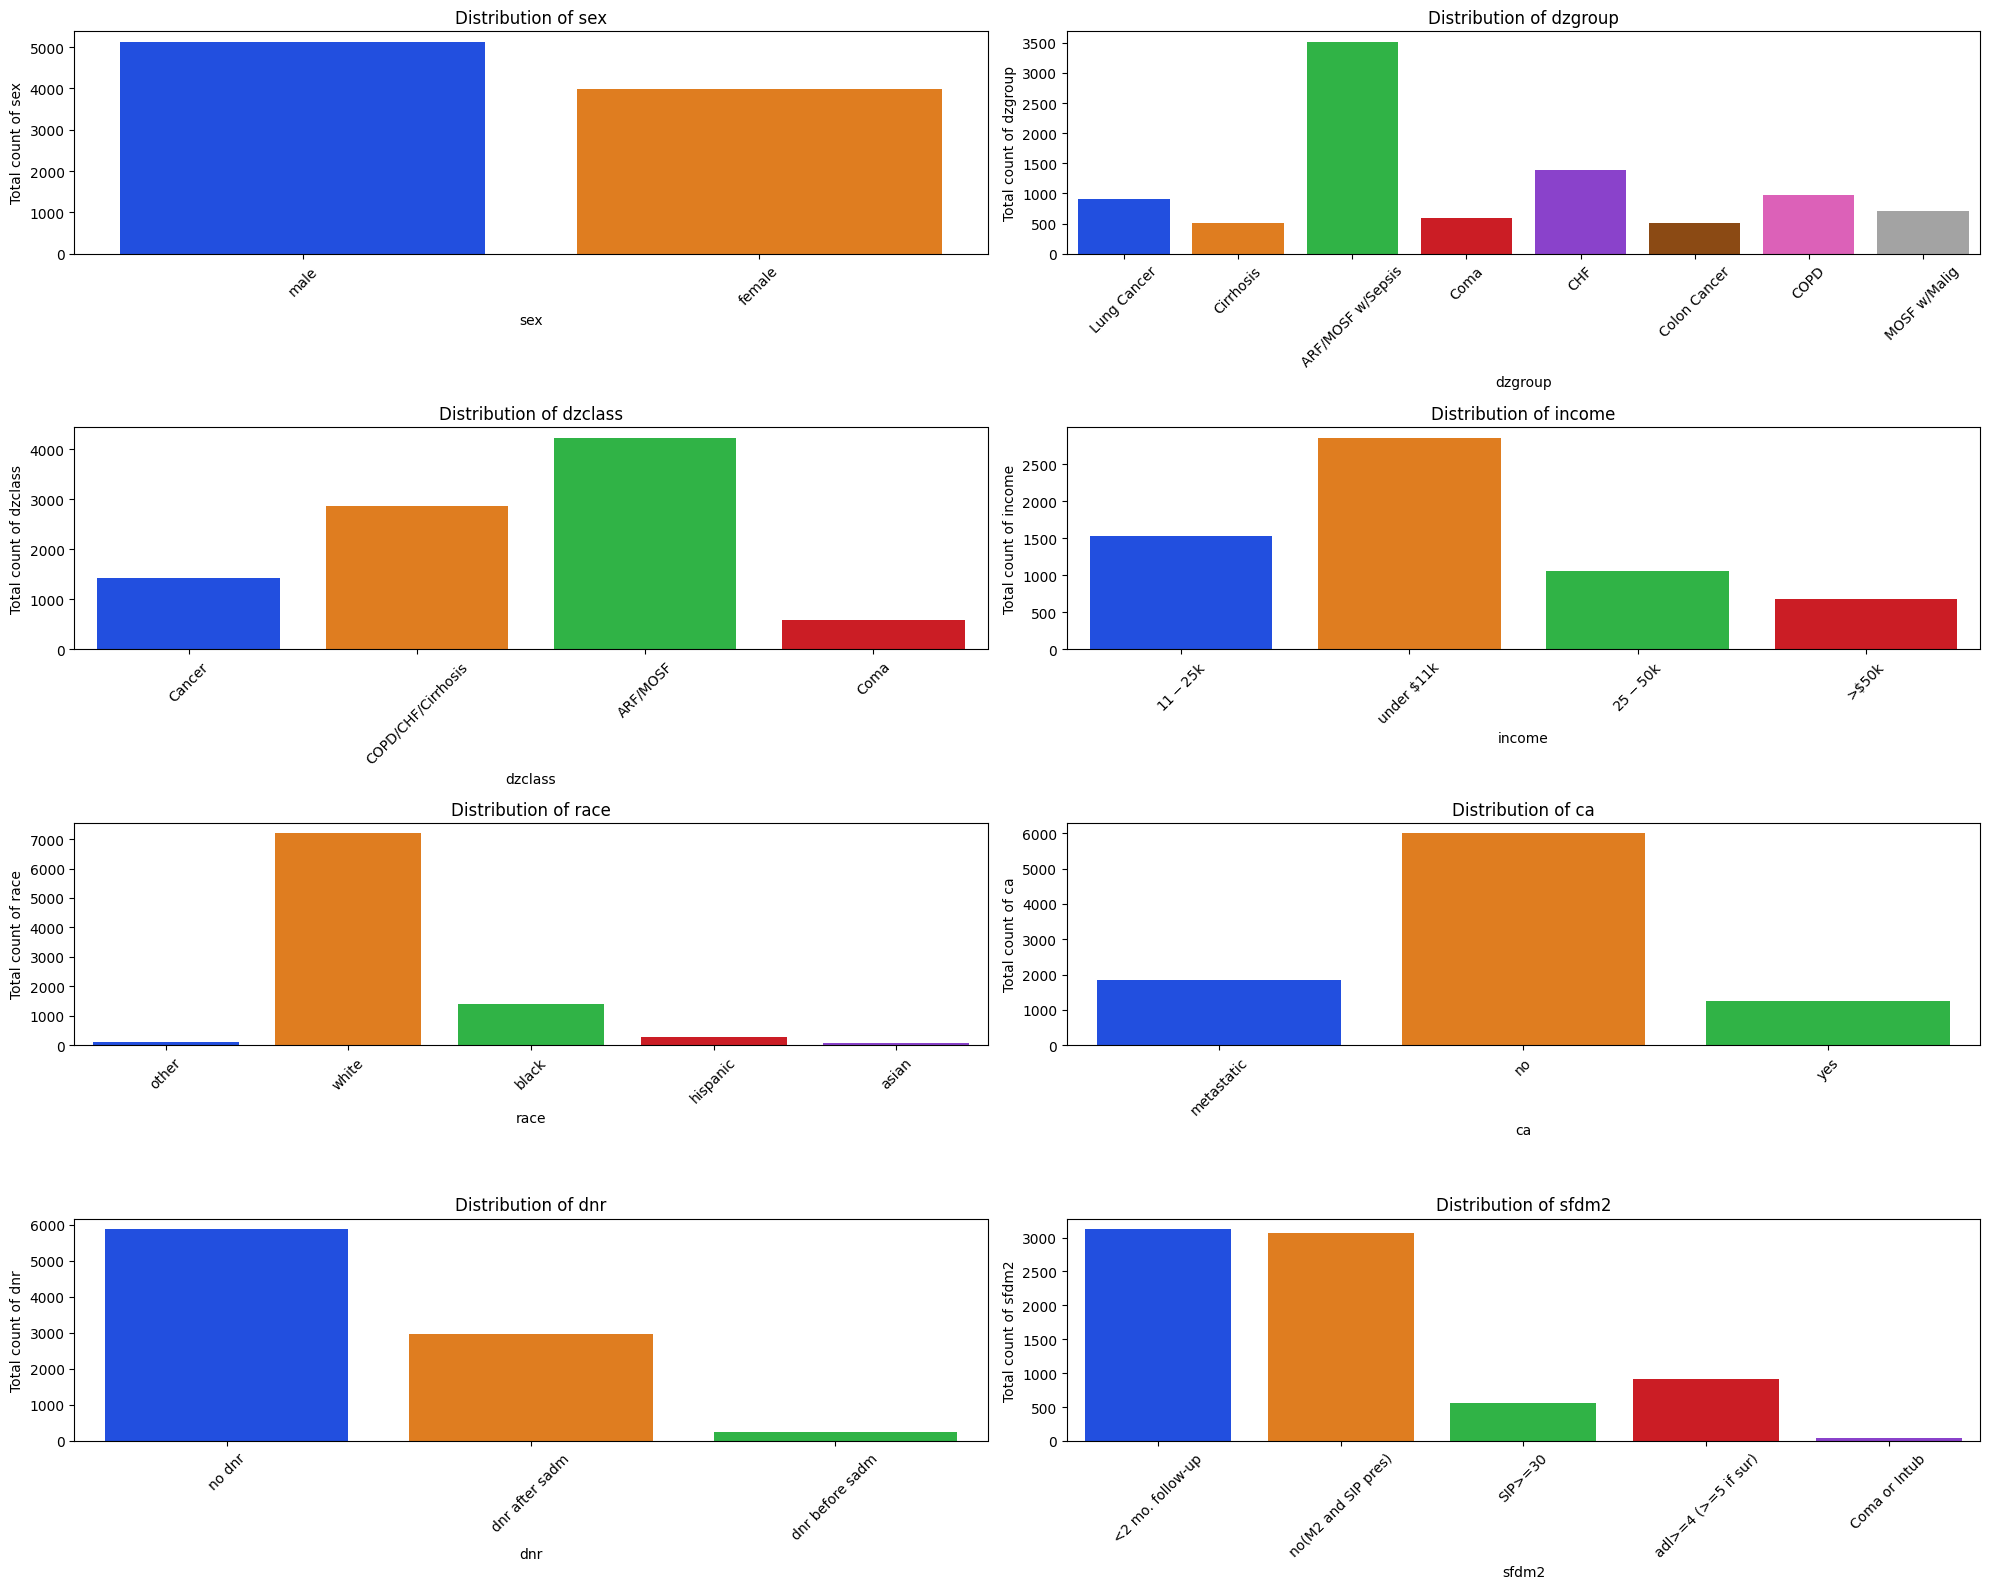

In [8]:
# Data distrubution
df_dist = t_data.select_dtypes(include=['object'])

# For determining the number of rows and columns for the subplots
no_cols = 2
no_rows = (len(df_dist.columns) + no_cols - 1) // no_cols

# For creating the subplots
fig, axes = plt.subplots(no_rows, no_cols, figsize=(10 * no_cols, 4 * no_rows))

# For flattening the axes array for easy indexing
axes = axes.flatten()

# Plotting the distribution of each object-type column in its respective subplot
for i, column in enumerate(df_dist.columns):
    sns.countplot(data=df_dist, x=column, ax=axes[i], palette='bright')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel(f"Total count of {column}")

# For hiding any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

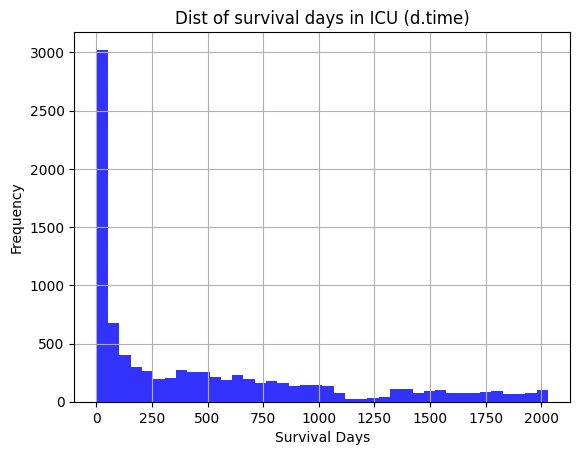

In [6]:
# Distribution of ICU Survival Days(d.time) for Regression
t_data['d.time'].hist(bins=40, color='blue', alpha=0.8)
plt.title("Dist of survival days in ICU (d.time)")
plt.xlabel("Survival Days")
plt.ylabel("Frequency")
plt.show()

The result is right-skewed, which means more patients died and only few survived long.

<ipython-input-7-51fe515e37d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='surv6m', data=t_data, palette=['red', 'green'])
<ipython-input-7-51fe515e37d0>:3: UserWarning: 
The palette list has fewer values (2) than needed (936) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='surv6m', data=t_data, palette=['red', 'green'])


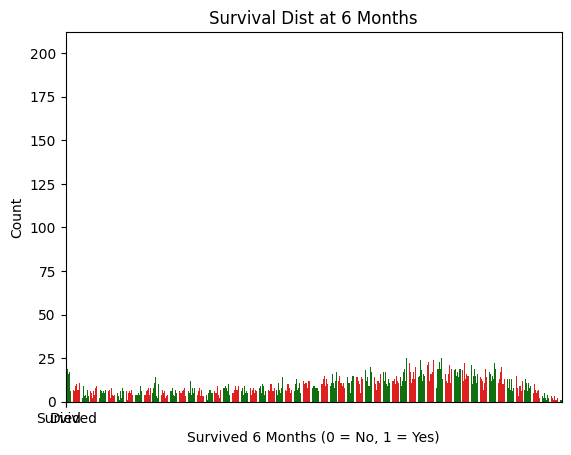

In [7]:
# Survival Dist at 6 Months(surv6m) for Classification Task
# Red for deaths, Green for survivors
sns.countplot(x='surv6m', data=t_data, palette=['red', 'green'])
plt.title("Survival Dist at 6 Months")
plt.xlabel("Survived 6 Months (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['Died', 'Survived'])
plt.show()


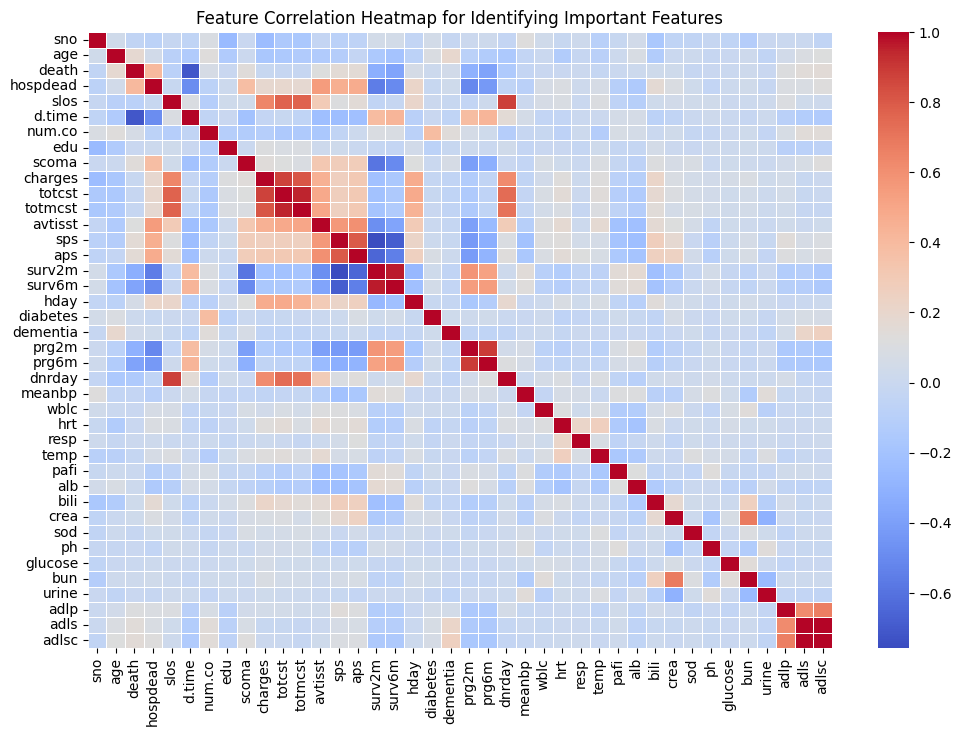

In [8]:
# Correlation Matrix Heatmap - Feature Relationships
plt.figure(figsize=(12,8))
corr_matrix = t_data.corr(numeric_only=True)    # Excluded categorical
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap for Identifying Important Features")
plt.show()

Heatmap shows feature relationship, which helps us to feature selection.

For example, heart rate and Blood Pressure are somewhat similar, so to reduce redudency we take only one.

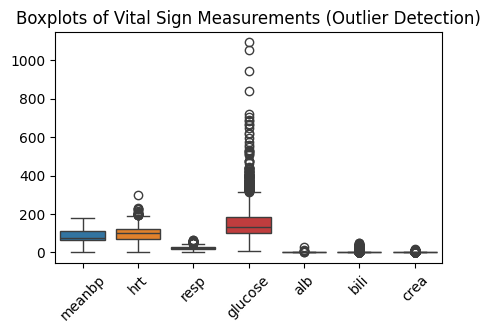

In [9]:
# I have plot Boxplots for outlier detection for ensuring data integrity
vitals = ['meanbp', 'hrt', 'resp', 'glucose', 'alb', 'bili', 'crea']
df_vitals = t_data[vitals].dropna()

plt.figure(figsize=(5,3))
sns.boxplot(data=df_vitals)
plt.xticks(rotation=45)
plt.title("Boxplots of Vital Sign Measurements (Outlier Detection)")
plt.show()


In [10]:
# Generating a table that shows count and percentage of missing values.
def data_gap_summary(dataframe):
    # Calculate total missing value percentage
    overall_missing_pct = (
        ((dataframe.isnull() | dataframe.isna() | (dataframe == '')).sum().sum())
        / dataframe.size * 100
    ).round(2)

    print(f"\nOverall missing value percentage: {overall_missing_pct}%\n")

    # Column-wise missing value count
    missing_vals = (dataframe.isnull() | dataframe.isna()).sum() + (dataframe == '').sum()

    # Column-wise missing value percentage
    missing_pct = ((missing_vals / len(dataframe)) * 100).round(2)




    # Combine into a DataFrame
    summary_table = pd.DataFrame({
        "Missing Count": missing_vals})
    # Example usage
data_gap_summary(t_data)



Overall missing value percentage: 10.78%



It is to identify extreme values that can impact our prediction.

<ipython-input-11-ce761c077f54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="dzclass", data=t_data, order=t_data["dzclass"].value_counts().index,palette='viridis')


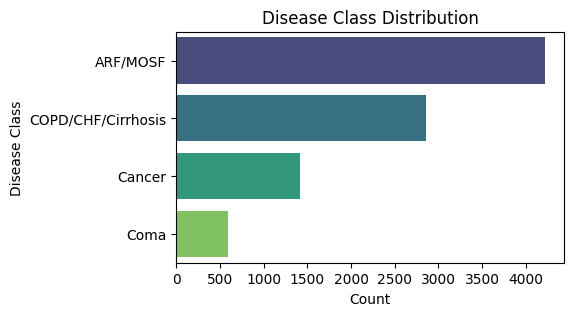

In [11]:
# Distribution of disease classes
plt.figure(figsize=(5, 3))
sns.countplot(y="dzclass", data=t_data, order=t_data["dzclass"].value_counts().index,palette='viridis')
plt.title("Disease Class Distribution")
plt.xlabel("Count")
plt.ylabel("Disease Class")
plt.show()

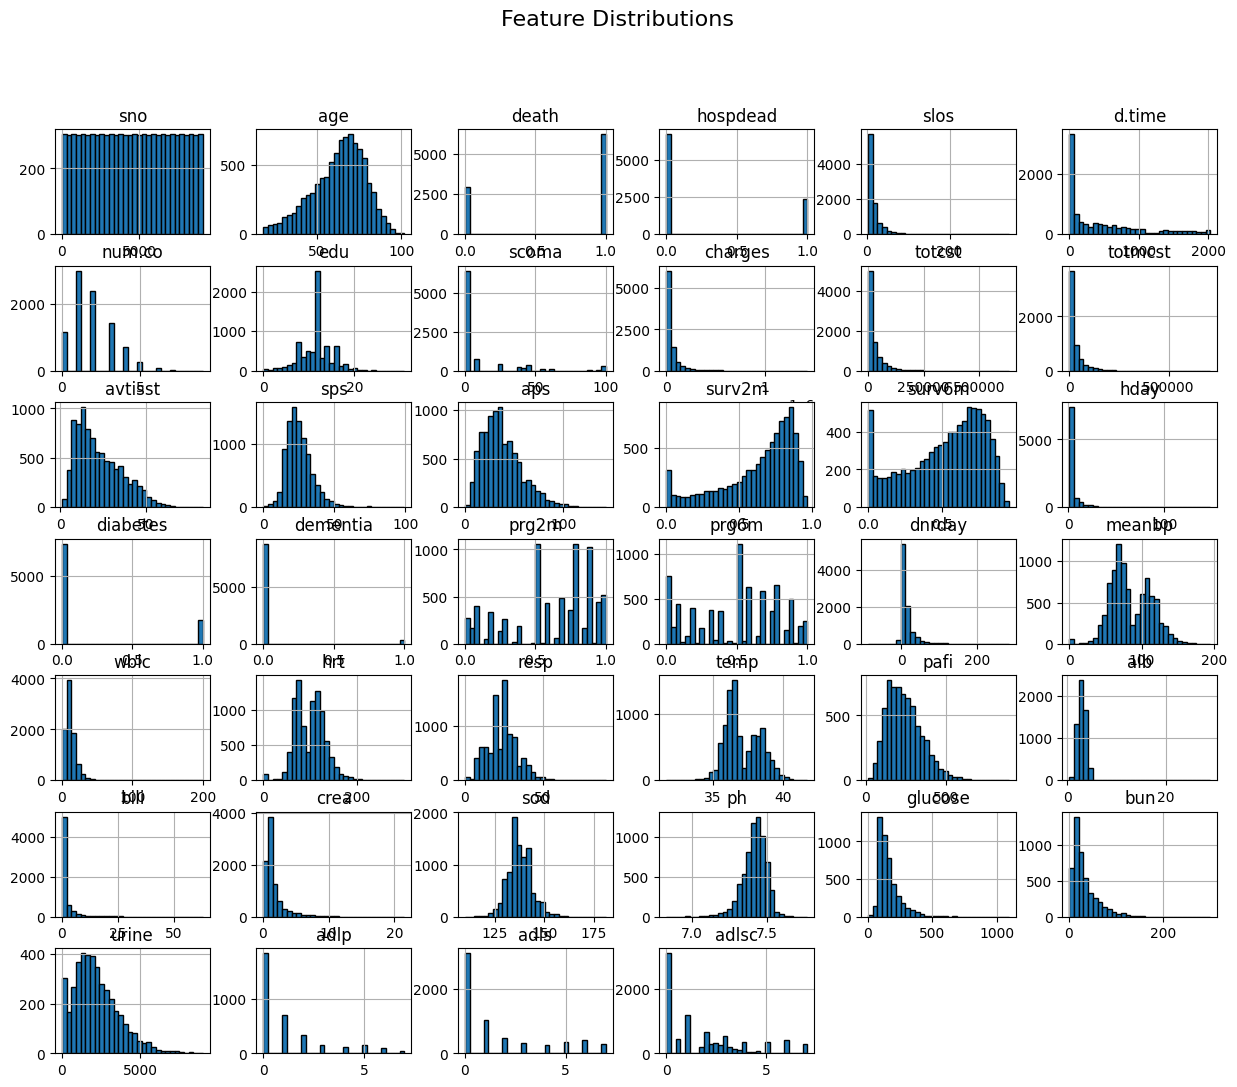

In [12]:
# Plot histograms for all numerical features
t_data.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

This is to dentify skewness, outliers, and the potential for normalization needs.

<ipython-input-13-3efc56678800>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=t_data["death"],palette='viridis')


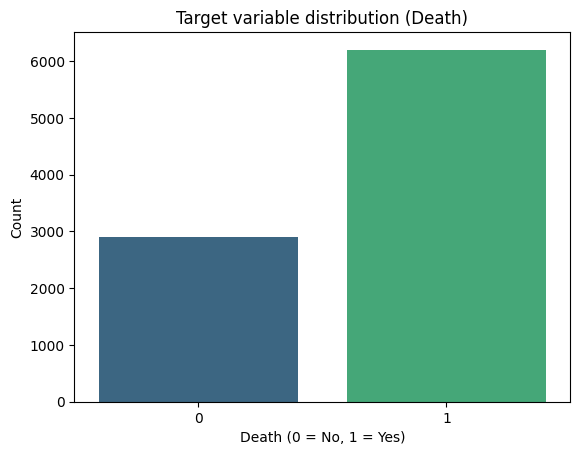

In [13]:
sns.countplot(x=t_data["death"],palette='viridis')
plt.title("Target variable distribution (Death)")
plt.xlabel("Death (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

## 4. Data Preprocessing

Why Do We Need to Handle Missing Values? (a). Machine learning cannot process null values directly.

(b). Missing data can lead model to biasness that can lead to make false predictions.

(c). There are some missing values which are very important for ICU survival prediction, so we must fill them carefully insted of dropping them.

Some missing values are critical for ICU survival prediction, so we must fill them carefully instead of dropping them.

### 4.1 Handling null values

In [14]:
t_data.isna().sum()

,0
sno,0
age,0
death,0
sex,0
hospdead,0
slos,0
d.time,0
dzgroup,0
dzclass,0
num.co,0


In [15]:
# To have a look at the features which has most number of null values.
t_data.isna().sum().sort_values(ascending=False)

,0
adlp,5641
urine,4862
glucose,4500
bun,4352
totmcst,3475
alb,3372
income,2982
adls,2867
bili,2601
pafi,2325


Missing values in the SUPPORT2 dataset are handled differently based on their significance to the prediction task.

Critical medical features such as glucose, blood urea nitrogen (BUN), albumin, bilirubin, PaO2/FiO2 ratio, pH, and creatinine, are directly related to patient survival and ICU conditions are imputed using median imputation.

While less critical features such as Certain variables, such as income, total medical costs (totmcst), and ambiguous columns like sfdm2 are removed or imputed using mode imputation. Minimal missing data features are handled using mode or median imputation to ensure data integrity.

In [16]:
# 4.1 Handling Missing Values

# Create a copy of the dataset to avoid modifying the original data
cleaned_data = t_data.copy()

In [17]:
# Identify missing values before handling
missing_values_before = cleaned_data.isnull().sum().sort_values(ascending=False)
print("Missing values before handelling:")
print(missing_values_before[missing_values_before > 0])

Missing values before handelling:
adlp       5641
urine      4862
glucose    4500
bun        4352
totmcst    3475
alb        3372
income     2982
adls       2867
bili       2601
pafi       2325
ph         2284
prg2m      1649
edu        1634
prg6m      1633
sfdm2      1400
totcst      888
wblc        212
charges     172
avtisst      82
crea         67
race         42
dnr          30
dnrday       30
sps           1
sod           1
hrt           1
scoma         1
temp          1
surv2m        1
surv6m        1
meanbp        1
aps           1
resp          1
dtype: int64


In [18]:
# 4.1 (a) Handling critical medical features by Median Imputation.
medical_features = ['glucose', 'bun', 'alb', 'bili', 'pafi', 'ph', 'crea', 'wblc', 'urine', 'avtisst']
imputer_median = SimpleImputer(strategy='median')  # By using median imputation
cleaned_data[medical_features] = imputer_median.fit_transform(cleaned_data[medical_features])

In [19]:
# 4.1 (b) Handling less critical features by dropping unnecessary columns & mode imputation
cleaned_data.drop(columns=['income', 'totcst', 'totmcst', 'sfdm2', 'adlp', 'adls', 'prg2m', 'prg6m', 'charges'], inplace=True)  # Drop irrelevant columns

In [20]:
# 4.1 (c) Mode imputation for categorical variables
cat_features = ['edu', 'race', 'dnr', 'dnrday']
imputer_mode = SimpleImputer(strategy='most_frequent')  # Using mode imputation
cleaned_data[cat_features] = imputer_mode.fit_transform(cleaned_data[cat_features])

In [21]:
# Median Imputation for minimal missing data numerical features
minimal_missing_features_median = ['aps', 'sps', 'scoma', 'meanbp', 'hrt', 'resp', 'temp', 'surv2m', 'surv6m', 'sod']
cleaned_data[minimal_missing_features_median] = imputer_median.fit_transform(cleaned_data[minimal_missing_features_median])

In [22]:
# Check for desired results  if all missing values are handled
missing_values_after = cleaned_data.isnull().sum().sum()
print("Missing values successfully handled" if missing_values_after == 0 else f"{missing_values_after} Missing values still exist")

Missing values successfully handled


In [23]:
cleaned_data.isna().sum().sort_values(ascending=False)

,0
sno,0
age,0
death,0
sex,0
hospdead,0
slos,0
d.time,0
dzgroup,0
dzclass,0
num.co,0


In [24]:
cleaned_data.head()

,sno,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlsc
0,1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,...,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,135.0,23.0,1968.0,7.0
1,2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,98.00000,2.899902,0.899902,5.500000,132.0,7.250000,135.0,23.0,1968.0,1.0
2,3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,231.65625,2.899902,2.199707,2.000000,134.0,7.459961,135.0,23.0,1968.0,0.0
3,4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,...,224.00000,2.899902,0.899902,0.799927,139.0,7.419922,135.0,23.0,1968.0,0.0
4,5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,173.31250,2.899902,0.899902,0.799927,143.0,7.509766,135.0,23.0,1968.0,2.0


### 4.2 Encoding Categorical Variables
It converts text-based columns into numerical values because machine learning models cannot process text directly.


We look at our features in data,

 sex has values "male" and "female" and dnr (Do Not Resuscitate) has only yes and no, so they are binary. Encoding Method is Label Encoding.




 Race and ca (Cancer Type)
 is multi-class. Encoding Method is One-Hot Encoding.






In [25]:
"""cleaned_data['dzclass'].unique()"""

"cleaned_data['dzclass'].unique()"

In [26]:
"""cleaned_data['ca'].unique()"""

"cleaned_data['ca'].unique()"

In [27]:
"""cleaned_data['race'].unique()"""

"cleaned_data['race'].unique()"

In [28]:
"""cleaned_data['dzgroup'].unique()"""

"cleaned_data['dzgroup'].unique()"

In [29]:
"""target_dataset = cleaned_data['dzclass']
target_dataset.head()"""

"target_dataset = cleaned_data['dzclass']\ntarget_dataset.head()"

In [30]:
cleaned_data.head()

,sno,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlsc
0,1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,...,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,135.0,23.0,1968.0,7.0
1,2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,98.00000,2.899902,0.899902,5.500000,132.0,7.250000,135.0,23.0,1968.0,1.0
2,3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,231.65625,2.899902,2.199707,2.000000,134.0,7.459961,135.0,23.0,1968.0,0.0
3,4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,...,224.00000,2.899902,0.899902,0.799927,139.0,7.419922,135.0,23.0,1968.0,0.0
4,5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,173.31250,2.899902,0.899902,0.799927,143.0,7.509766,135.0,23.0,1968.0,2.0


In [31]:
"""encoded_data = cleaned_data.copy()

# Apply One-Hot Encoding to categorical variables
encoded_data = pd.get_dummies(encoded_data, columns=['sex', 'race', 'dzgroup', 'dzclass', 'ca', 'dnr'], drop_first=True)

# Convert Boolean values to Integer (Ensures 0/1 format instead of True/False)
for col in encoded_data.select_dtypes(include=['bool']).columns:
    encoded_data[col] = encoded_data[col].astype(int)

# Verify Encoding Results
print(" Categorical Variables Successfully Encoded")
print(encoded_data.head())  # Check the transformed data
print(encoded_data.dtypes)  # Confirm all columns are now numerical"""

'encoded_data = cleaned_data.copy()\n\n# Apply One-Hot Encoding to categorical variables\nencoded_data = pd.get_dummies(encoded_data, columns=[\'sex\', \'race\', \'dzgroup\', \'dzclass\', \'ca\', \'dnr\'], drop_first=True)\n\n# Convert Boolean values to Integer (Ensures 0/1 format instead of True/False)\nfor col in encoded_data.select_dtypes(include=[\'bool\']).columns:\n    encoded_data[col] = encoded_data[col].astype(int)\n\n# Verify Encoding Results\nprint(" Categorical Variables Successfully Encoded")\nprint(encoded_data.head())  # Check the transformed data\nprint(encoded_data.dtypes)  # Confirm all columns are now numerical'

I have taken label encoder to improve R2 score and decreasing MSE and MAE.

In [32]:
cat_cols = cleaned_data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    cleaned_data[col] = le.fit_transform(cleaned_data[col].astype(str))
    label_encoders[col] = le
# For improving performance did not used one hot encoding

In [33]:
encoded_data = cleaned_data.copy()

In [34]:
encoded_data.shape

(9105, 39)

In [35]:
cleaned_data.shape

(9105, 39)

In [36]:
cleaned_data.columns

Index(['sno', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'scoma', 'avtisst', 'race', 'sps', 'aps',
       'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'ca', 'dnr',
       'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb',
       'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlsc'],
      dtype='object')

In [37]:
encoded_data.columns

Index(['sno', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'scoma', 'avtisst', 'race', 'sps', 'aps',
       'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'ca', 'dnr',
       'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb',
       'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlsc'],
      dtype='object')

In [38]:
encoded_data.head()

,sno,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlsc
0,1,62.84998,0,1,0,5,2029,6,2,0,...,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,135.0,23.0,1968.0,7.0
1,2,60.33899,1,0,1,4,4,3,1,2,...,98.00000,2.899902,0.899902,5.500000,132.0,7.250000,135.0,23.0,1968.0,1.0
2,3,52.74698,1,0,0,17,47,3,1,2,...,231.65625,2.899902,2.199707,2.000000,134.0,7.459961,135.0,23.0,1968.0,0.0
3,4,42.38498,1,0,0,3,133,6,2,2,...,224.00000,2.899902,0.899902,0.799927,139.0,7.419922,135.0,23.0,1968.0,0.0
4,5,79.88495,0,0,0,16,2029,0,0,1,...,173.31250,2.899902,0.899902,0.799927,143.0,7.509766,135.0,23.0,1968.0,2.0


In [39]:
cleaned_data.head()

,sno,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlsc
0,1,62.84998,0,1,0,5,2029,6,2,0,...,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,135.0,23.0,1968.0,7.0
1,2,60.33899,1,0,1,4,4,3,1,2,...,98.00000,2.899902,0.899902,5.500000,132.0,7.250000,135.0,23.0,1968.0,1.0
2,3,52.74698,1,0,0,17,47,3,1,2,...,231.65625,2.899902,2.199707,2.000000,134.0,7.459961,135.0,23.0,1968.0,0.0
3,4,42.38498,1,0,0,3,133,6,2,2,...,224.00000,2.899902,0.899902,0.799927,139.0,7.419922,135.0,23.0,1968.0,0.0
4,5,79.88495,0,0,0,16,2029,0,0,1,...,173.31250,2.899902,0.899902,0.799927,143.0,7.509766,135.0,23.0,1968.0,2.0


### 4.3 Handling outliers


In [40]:
# Outliers
Q1 = encoded_data.quantile(0.25)
Q3 = encoded_data.quantile(0.75)
IQR = Q3 - Q1
outliers = encoded_data[((encoded_data < (Q1 - 1.5 * IQR)) | (encoded_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(outliers)  # Print rows containing outliers in any column

       sno       age  death  sex  hospdead  slos  d.time  dzgroup  dzclass  \
0        1  62.84998      0    1         0     5    2029        6        2   
1        2  60.33899      1    0         1     4       4        3        1   
3        4  42.38498      1    0         0     3     133        6        2   
4        5  79.88495      0    0         0    16    2029        0        0   
5        6  93.01599      1    1         1     4       4        5        3   
...    ...       ...    ...  ...       ...   ...     ...      ...      ...   
9100  9101  66.07300      0    1         0    23     350        0        0   
9101  9102  55.15399      0    0         0    29     347        5        3   
9102  9103  70.38196      0    1         0     8     346        0        0   
9103  9104  47.01999      1    1         1     7       7        7        0   
9104  9105  81.53894      1    0         0    12     198        0        0   

      num.co  ...       pafi       alb      bili      crea    s

In [41]:
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

# Apply outlier removal to specific columns (replace with your actual columns)
columns_to_check = ['meanbp', 'hrt', 'resp', 'glucose', 'alb', 'bili', 'crea']  # Example columns

for column in columns_to_check:
    encoded_data = remove_outliers_iqr(encoded_data, column)

### 4.3 Taking half data set to reduce run time.

In [42]:
num_cols = encoded_data.select_dtypes(include=['float64', 'int64']).columns

In [43]:
# Standardize numerical features
scaler = StandardScaler()
encoded_data[num_cols] = scaler.fit_transform(encoded_data[num_cols])

In [44]:
# Reduce dataset size by taking a 50% random sample
half_data = encoded_data.sample(frac=0.5, random_state=42)

# Confirm the new dataset size
print(f"Reduced dataset size: {half_data.shape}")

Reduced dataset size: (1444, 39)


In [45]:
print(f"Reduced dataset size: {half_data.shape}")

Reduced dataset size: (1444, 39)


In [46]:

# # Drop columns with too many missing values (threshold > 40%)
# drop_cols = [ 'urine', 'glucose', 'bun']
# half_data.drop(columns=drop_cols, inplace=True)

In [47]:
# num_cols = half_data.select_dtypes(include=['float64', 'int64']).columns

In [48]:
# # Standardize numerical features
# scaler = StandardScaler()
# half_data[num_cols] = scaler.fit_transform(half_data[num_cols])

##5. Feature Selection

### Feature Reduction

In [49]:
# Define target and features
target = 'd.time'
X_sampled = half_data.drop(columns=[target])
y_sampled = half_data[target]

### Split Train and Test Dataset

In [50]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

## 6. Model Training

### Baseline Model Comparison.

I am taking a Machine Learning model, Linear Regression, for future comparison.

In [51]:
# I took Linear Regression for comparison
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

y_pred_baseline = baseline_model.predict(X_test)
baseline_mse = mean_squared_error(y_test, y_pred_baseline)

print(f'Baseline MSE: {baseline_mse}')

Baseline MSE: 0.2751997239114726


In [52]:
# R2 for Linear Regression

r2_linear = r2_score(y_test, y_pred_baseline)
print(f"Linear Regression R² Score: {r2_linear:.4f}")

Linear Regression R² Score: 0.7145


In [53]:
y_pred_baseline

array([-0.41603478, -0.24149323, -0.42240854, -0.10796149, -0.23153137,
       -0.89557604, -0.50365091, -0.33601121, -0.3954342 , -0.24186292,
        1.25005895, -0.5970162 ,  1.06738692,  1.3438506 , -0.45601986,
       -0.06142909,  1.4486337 , -0.96061547, -0.49314101, -0.67647372,
       -0.23915678, -0.17646797, -0.56682241, -0.16622118, -0.26482681,
       -0.02602653, -0.53875261, -0.68340962, -0.00608722,  1.49527802,
       -0.50359097, -0.52409024, -0.16351511, -0.69734037,  1.26480342,
       -0.39151995, -0.25015605,  1.41056439,  1.35775908, -0.22293263,
       -0.03502496, -0.68364555, -0.56645828, -0.52152699,  1.94784414,
        1.26900562,  1.32426939,  1.25460684, -0.7142915 , -0.12822547,
        1.23698429, -0.66112494, -0.21930852, -0.28140882, -0.70943774,
       -0.23195209,  1.11550299, -0.95275268, -0.33296478, -0.59098384,
       -0.00745064,  1.30489261, -0.51929263, -0.21217071, -0.45723853,
       -0.32869189, -0.42270104, -0.37295224,  1.36069062, -0.33

In [54]:
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
print(f'Baseline MAE: {baseline_mae}')

Baseline MAE: 0.4019233173591605


In [55]:
results = {}

In [56]:
evalution = pd.DataFrame({
    'Model': pd.Series(dtype='str'),
    'No of Rows': pd.Series(dtype='int'),
    'Kernel': pd.Series(dtype='str'),
    'MSE': pd.Series(dtype='float'),
    'MAE': pd.Series(dtype='float'),
    'R2': pd.Series(dtype='float')
})

In [57]:
def store_result(model,rows_used,kernel,mse,mae,r2):
  new_df = pd.DataFrame({'Model':model,'No of Rows':rows_used,'Kernel':kernel, 'MSE':mse, 'MAE':mae, 'R2':r2},index=[0])
  evalution = pd.concat([evalution,new_df],ignore_index=True)
  return evalution

### Kernel RBF

In [58]:

# Initialize an empty DataFrame to store evaluation results
evalution = pd.DataFrame(columns=['Model', 'No of Rows', 'Kernel', 'MSE', 'MAE', 'R2'])

# Function to store model results
def store_result(eval_df, model, rows_used, kernel, mse, mae, r2):
    new_df = pd.DataFrame({'Model': [model], 'No of Rows': [rows_used],
                           'Kernel': [kernel], 'MSE': [mse], 'MAE': [mae], 'R2': [r2]})
    eval_df = pd.concat([eval_df, new_df], ignore_index=True)
    return eval_df  # Return updated DataFrame

# Initialize the GP model with the current kernel
gpr = GaussianProcessRegressor(kernel=RBF(), alpha=0.5)

# Train the model
gpr.fit(X_train, y_train)

# Predict on the test set and get standard deviations
y_pred, y_std = gpr.predict(X_test, return_std=True)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print('Kernel: RBF()')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

# Update evaluation DataFrame
evalution = store_result(evalution, 'GaussianProcessRegressor', len(y_train), 'RBF', mse, mae, r2)

Kernel: RBF()
Mean Squared Error: 0.2578
Mean Absolute Error: 0.3935
R² Score: 0.7325


<ipython-input-58-cc3515f494a4>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eval_df = pd.concat([eval_df, new_df], ignore_index=True)


### Kernel Matern

In [59]:
# Initialize the GP model with the current kernel
gpr =  GaussianProcessRegressor(kernel=  Matern(nu=1.5), alpha=0.5)
# Train the model
gpr.fit(X_train, y_train)
# Predict on the test set and get standard deviations
y_pred, y_std = gpr.predict(X_test, return_std=True)
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print results
print(f"Kernel: {Matern(nu=1.5)}, MSE: {mse:.4f}, MAE: {mae:.4f}, R² Score: {r2:.4f}")
# Store predictions and standard deviations in DataFrame
results["Matern(nu=1.5)"] = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Std_Dev': y_std
})
evalution = store_result(evalution, 'GaussianProcessRegressor', len(y_train), 'Matern', mse, mae, r2)


Kernel: Matern(length_scale=1, nu=1.5), MSE: 0.2561, MAE: 0.3940, R² Score: 0.7343


In [60]:
# Initialize the GP model with the current kernel
gpr =  GaussianProcessRegressor(kernel=  Matern(nu=2.5), alpha=0.5)
# Train the model
gpr.fit(X_train, y_train)
# Predict on the test set and get standard deviations
y_pred, y_std = gpr.predict(X_test, return_std=True)
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print results
print(f"Kernel: {Matern(nu=1.5)}, MSE: {mse:.4f}, MAE: {mae:.4f}, R² Score: {r2:.4f}")
# Store predictions and standard deviations in DataFrame
results["Matern(nu=1.5)"] = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Std_Dev': y_std
})
evalution = store_result(evalution, 'GaussianProcessRegressor', len(y_train), 'Matern nu=2.5', mse, mae, r2)


Kernel: Matern(length_scale=1, nu=1.5), MSE: 0.2558, MAE: 0.3928, R² Score: 0.7346


### kernel RationalQuadratic

In [61]:
# Initialize the GP model with the current kernel
gpr = GaussianProcessRegressor(kernel=RationalQuadratic(), alpha=0.1)
# Train the model
gpr.fit(X_train, y_train)
# Predict on the test set and get standard deviations
y_pred, y_std = gpr.predict(X_test, return_std=True)
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print results
print(f"Kernel: {RationalQuadratic()}, MSE: {mse:.4f}, MAE: {mae:.4f}, R² Score: {r2:.4f}")
# Store predictions and standard deviations in DataFrame
results["RationalQuadratic()"] = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Std_Dev': y_std
})

evalution = store_result(evalution, 'GaussianProcessRegressor', len(y_train), 'RationalQuadratic', mse, mae, r2)


Kernel: RationalQuadratic(alpha=1, length_scale=1), MSE: 0.2585, MAE: 0.3806, R² Score: 0.7318


## 7. Model Evaluation

In [62]:
evalution

,Model,No of Rows,Kernel,MSE,MAE,R2
0,GaussianProcessRegressor,1155,RBF,0.257818,0.393528,0.732537
1,GaussianProcessRegressor,1155,Matern,0.256118,0.393979,0.734301
2,GaussianProcessRegressor,1155,Matern nu=2.5,0.255828,0.392753,0.734602
3,GaussianProcessRegressor,1155,RationalQuadratic,0.258520,0.380560,0.731808


In [63]:
results.keys()

dict_keys(['Matern(nu=1.5)', 'RationalQuadratic()'])

In [64]:
results['Matern(nu=1.5)']["GPR_Pred"] = results['Matern(nu=1.5)']["Predicted"].round(3).astype(str) + " ± " + results['Matern(nu=1.5)']["Std_Dev"].round(3).astype(str)

In [65]:
results['Matern(nu=1.5)'].head()

,Actual,Predicted,Std_Dev,GPR_Pred
7920,-0.818757,-0.392831,0.301294,-0.393 ± 0.301
3876,1.394592,-0.113527,0.215025,-0.114 ± 0.215
6509,-0.705441,-0.501286,0.247245,-0.501 ± 0.247
302,-0.331644,-0.010894,0.150222,-0.011 ± 0.15
5971,0.847142,-0.179692,0.124314,-0.18 ± 0.124


In [66]:
# cross-validation to make sure our model is giving good results
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 fold CV with shuffling

# Run cross-validation and get MSE scores (by default they are neg)
mse_scores = cross_val_score(gpr, X_sampled, y_sampled, cv=kf, scoring='neg_mean_squared_error')

# Average and print the results ( to get actual MSE i flipped the sign)
print(f"Cross-Validated MSE: {-mse_scores.mean():.4f}")


Cross-Validated MSE: 0.2531


## 8. Conclusion & Insights

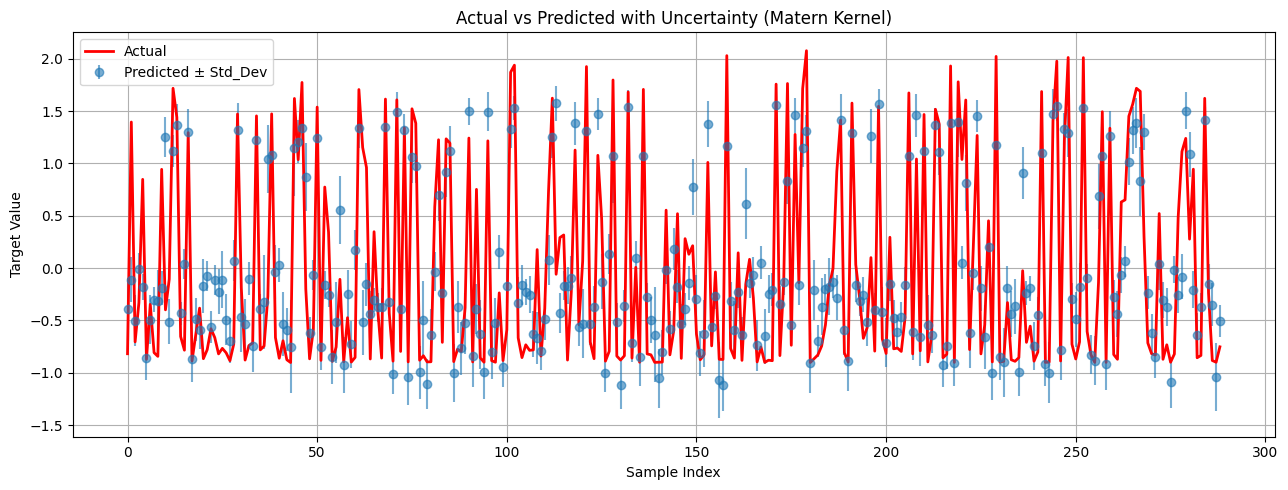

In [67]:
# Plotting Results
df = results['Matern(nu=1.5)'].reset_index(drop=True)

plt.figure(figsize=(13, 5))
plt.errorbar(x=range(len(df)), y=df['Predicted'], yerr=df['Std_Dev'], fmt='o', label='Predicted ± Std_Dev', alpha=0.6)
plt.plot(df['Actual'].values, label='Actual', color='red', linewidth=2)
plt.title('Actual vs Predicted with Uncertainty (Matern Kernel)')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
"""# cross-validation to make sure our model is giving good results
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 fold CV with shuffling

# Run cross-validation and get MSE scores (by default they are neg)
mse_scores = cross_val_score(gpr, X, y, cv=kf, scoring='neg_mean_squared_error')

# Average and print the results ( to get actual MSE i flipped the sign)
print(f"Cross-Validated MSE: {-mse_scores.mean():.4f}")




# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(gpr, X, y, cv=kf, scoring='neg_mean_squared_error')
print(f"Cross-Validated MSE: {-mse_scores.mean():.4f}")"""

'# cross-validation to make sure our model is giving good results\nkf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 fold CV with shuffling\n\n# Run cross-validation and get MSE scores (by default they are neg)\nmse_scores = cross_val_score(gpr, X, y, cv=kf, scoring=\'neg_mean_squared_error\')\n\n# Average and print the results ( to get actual MSE i flipped the sign)\nprint(f"Cross-Validated MSE: {-mse_scores.mean():.4f}")\n\n\n\n\n# Cross-validation\nkf = KFold(n_splits=5, shuffle=True, random_state=42)\nmse_scores = cross_val_score(gpr, X, y, cv=kf, scoring=\'neg_mean_squared_error\')\nprint(f"Cross-Validated MSE: {-mse_scores.mean():.4f}")'

In [69]:
"""# Experimenting with different kernels
kernels = [RBF(), Matern(nu=1.5), RationalQuadratic()]
for kernel in kernels:
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=1.0)
    gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Kernel: {kernel}, MSE: {mse:.4f}, MAE: {mae:.4f}, R² Score: {r2:.4f}")"""

'# Experimenting with different kernels\nkernels = [RBF(), Matern(nu=1.5), RationalQuadratic()]\nfor kernel in kernels:\n    gpr = GaussianProcessRegressor(kernel=kernel, alpha=1.0) \n    gpr.fit(X_train, y_train)\n    y_pred = gpr.predict(X_test)\n    mse = mean_squared_error(y_test, y_pred)\n    mae = mean_absolute_error(y_test, y_pred)\n    r2 = r2_score(y_test, y_pred)\n    print(f"Kernel: {kernel}, MSE: {mse:.4f}, MAE: {mae:.4f}, R² Score: {r2:.4f}")'

In [70]:
"""# Experimenting with different kernels
kernels = [RBF(), Matern(nu=1.5), RationalQuadratic()]
for kernel in kernels:
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1)
    gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Kernel: {kernel}, MSE: {mse:.4f}, MAE: {mae:.4f}, R² Score: {r2:.4f}")"""


# After trying took help of chatgpt in selecting best kernel.

'# Experimenting with different kernels\nkernels = [RBF(), Matern(nu=1.5), RationalQuadratic()]\nfor kernel in kernels:\n    gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1) \n    gpr.fit(X_train, y_train)\n    y_pred = gpr.predict(X_test)\n    mse = mean_squared_error(y_test, y_pred)\n    mae = mean_absolute_error(y_test, y_pred)\n    r2 = r2_score(y_test, y_pred)\n    print(f"Kernel: {kernel}, MSE: {mse:.4f}, MAE: {mae:.4f}, R² Score: {r2:.4f}")'

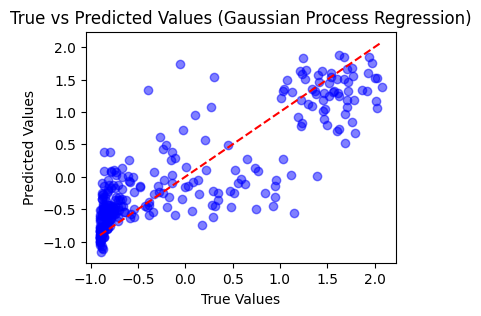

In [71]:
# This helps us visualize how well the model predict that align with actual values.
plt.figure(figsize=(4,3))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # 45-degree reference line
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values (Gaussian Process Regression)")
plt.show()

It shows good fitting that points are close to red line.

Error distrubution to detect bias.


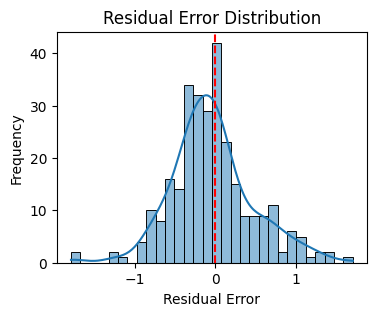

In [72]:
residuals = y_test - y_pred  # Calculate residuals

plt.figure(figsize=(4,3))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')  # Reference line at 0
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Residual Error Distribution")
plt.show()

It is symmetric around zero, if it was skewed then it might overpredict or underpredict.

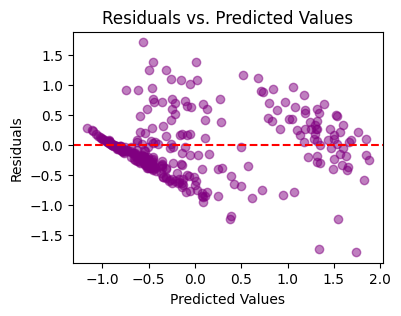

In [73]:
plt.figure(figsize=(4,3))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='dashed')  # Zero residual reference line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

It is a good fit because it scattered around zero.

- For knowing what features impacted our d.time the most i have to use permutation_importance, since GPR doesn’t provide direct feature importance.

The most influential features are sfdm2, dzgroup, slos as sno is serial number and death is our target variable itself.

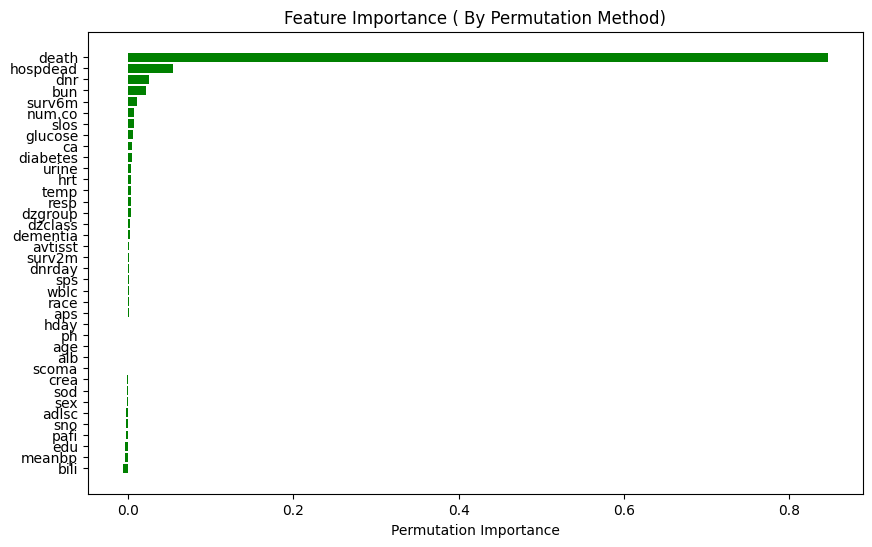

In [74]:

# Compute feature importance
perm_importance = permutation_importance(gpr, X_test, y_test, scoring='neg_mean_squared_error')

# Sort feature importance scores
sorted_idx = perm_importance.importances_mean.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], color='green')
plt.xlabel("Permutation Importance")
plt.title("Feature Importance ( By Permutation Method)")
plt.show()

This will show us the trend and predicted values.

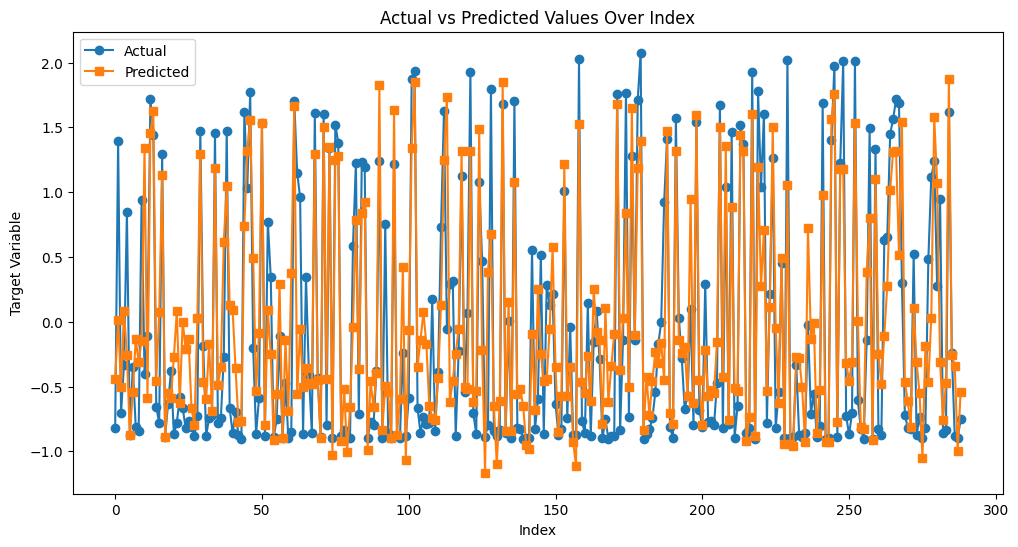

In [75]:
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), y_test, label="Actual", marker="o")
plt.plot(range(len(y_test)), y_pred, label="Predicted", marker="s")
plt.xlabel("Index")
plt.ylabel("Target Variable")
plt.title("Actual vs Predicted Values Over Index")
plt.legend()
plt.show()

Predected values are following the Trend values.